# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.159229e+01     1.281384e+01
 * time: 0.004554033279418945
     1     6.298627e+01     8.856959e+00
 * time: 0.012796163558959961
     2     5.656082e+01     1.089014e+01
 * time: 0.031131982803344727
     3     4.085676e+01     7.478969e+00
 * time: 0.05482006072998047
     4     3.037031e+01     6.854493e+00
 * time: 0.1572110652923584
     5     2.469657e+01     5.549797e+00
 * time: 0.17799615859985352
     6     1.129273e+01     2.082142e+00
 * time: 0.19661903381347656
     7     8.207688e+00     2.674481e+00
 * time: 0.21187520027160645
     8     6.655250e+00     2.459604e+00
 * time: 0.2271580696105957
     9     6.278442e+00     8.639281e-01
 * time: 0.24258708953857422
    10     5.977669e+00     1.038064e+00
 * time: 0.25589704513549805
    11     5.852090e+00     8.321287e-01
 * time: 0.26860713958740234
    12     5.727783e+00     6.514203e-01
 * time: 0.2810859680175781
    13     5.590286e+00     5.975521e-01
 * time:

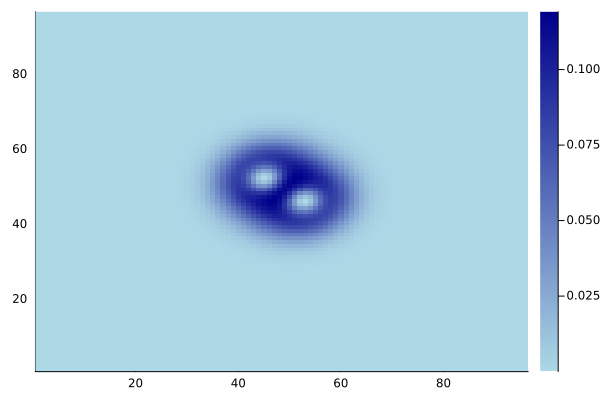

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)